# <center>Effects of Sacking and Replacing a Manager on a Soccer Team Performance</center>

## <center>By: Bryan (Bumseok) Kim</center>

Imagine you own a giant multi-billion dollar sports team, but your team fails to perform at a satisfactory level. The fans and experts criticize your head manager of the team. Should you sack the manager and replace them with someone new or give them more time to redeem themselves? This is a dilemma that numerous soccer club owners go through each season. 

### Background
From the age of 4, a deep passion of mine was watching and playing soccer. As a soccer fanatic from an early age, I have seen many managers come and go; every season, at least one manager seemed to get sacked and replaced due to the underperformance of their team. This made me curious as to what the real impact of replacing a manager on a team's performance was. Thus, in this project, I wanted to investigate if sacking and replacing a manager would yield better results for the team. To do so, I will analyze data from the top teams in the English Premier League Soccer (teams that have been present in the league for the past 10 years). The Premier League is globally acknowledged as the best league in the soccer world, so it would be appropriate to examine the effects of managerial change on team performances at the world class level.

### Hypothesis
Before conducting analysis on the data, I hypothesize that changes in soccer team managers does yield better results. I made this hypothesis since, from my recollection of past managerial changes and interviews from players, new managers tend to perform well for their first few games due to a change in the team players' mentality and attitude. This is because, usually before a manager is sacked for their poor performance, players tend to distrust their managers' tactics and are hence psychologically demotivated. Once a new manager joins the team, the players have a sense of hope that the new manager's tactics will improve the team, and it is this hope that motivates players to perform better than before.

### Aim & Method
To do this, I downloaded data from "https://datahub.io/sports-data/english-premier-league#data" to obtain Premier League results for the past 10 seasons, and queried them into my workspace. Then, I webscraped data from "https://en.wikipedia.org/wiki/List_of_Premier_League_managers" to collect data on mid-season managerial changes. I then cleaned and combined based on the sacking team and the match/sacking event dates. Then, for each instance of a sacking, I created a data frame consisting of 5 game results before and after the sacking. With this, I concatenated the before results together and the after results together resulting in 2 dataframes with 5 game results and 60 observations.

In [4]:
%store -r before
%store -r after

### Plots and Analysis

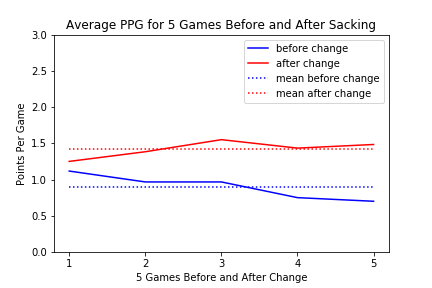

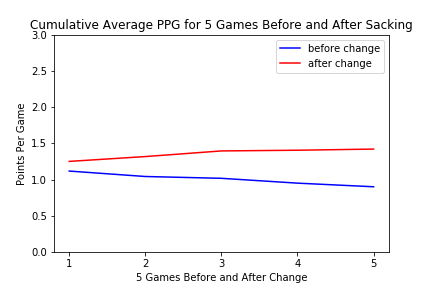

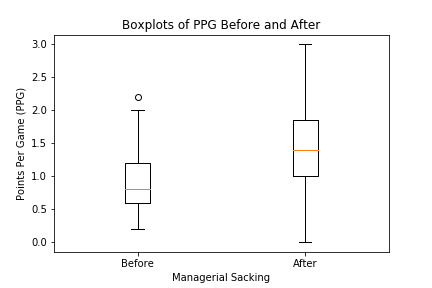

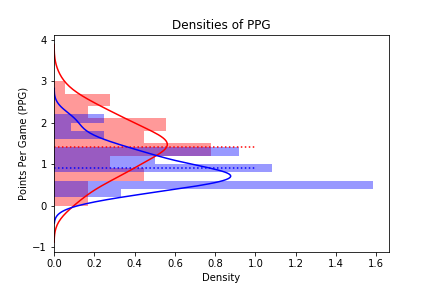

In [27]:
from IPython.display import display, Image, SVG
i = Image(filename='PPG_ba.png')
j = Image(filename='Cumavg_PPG.png')
k = Image(filename='Boxplot_PPG.png')
l = Image(filename='Densities_PPG.png')
display(i,j,k,l)

The plots above show that there is indeed a difference in team performance before and after a managerial change. However, to further prove that there is in fact an effect of managerial changes on teams' performance, we will use statistical analysis.

To statistically test if there was an improvement in team performance, I wanted to use a paired t-test since the before and after scores are not independent (we are examining the performance of the same team given a change in managers). A paired t-test tests whether the means of two dependent groups are significantly difference from each other. But for our t-test to be valid we need to check the normality of the differences. To do so, we use the Shapiro-Wilk test.

In [10]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

diff = after-before
stats.shapiro(diff)

(0.9189518690109253, 1.137985712607037e-11)

Since the p-value above of `1.137985712607037e-11` is less than $0.05$, we reject the null hypothesis and can conclude that the differences are NOT from a normal distribution. Hence, we must use the Wilcoxon Test instead of the paired t-test.

Using the resulting data sets I conducted a Wilcoxon test on the results before and after with: 
<center>$H_{0}: M_{diff} = 0 $</center>
<center>$H_{1}: M_{diff} \neq 0 $</center>
Where $M_{diff}$ is the median of the differences between the results before and after.

In [8]:
scipy.stats.wilcoxon(np.array(pd.melt(before)['value']),np.array(pd.melt(after)['value']))

WilcoxonResult(statistic=5658.0, pvalue=2.1057694023886934e-07)

The output above is the wilcoxon test on before and after data sets which consist of $\textit{all}$ games, regardless of team or manager. Since the p-value shown of `2.1057694023886934e-07` is less than the common threshold of $\alpha = 0.05$, we can conclude that we have statistically significant evidence to reject the null hypothesis, and thus to accept that the results of games after managerial changes are better (more points).

In [9]:
scipy.stats.wilcoxon(pd.array(before.mean()),pd.array(after.mean()))

WilcoxonResult(statistic=141.5, pvalue=6.084365033589189e-07)

The output above is the wilcoxon test on before and after data sets which consist of the average points earned in 5 games before and after a managerial change. Since the p-value shown of `6.084365033589189e-07` is less than the common threshold of $\alpha = 0.05$, we can again conclude that we have statistically significant evidence to reject the null hypothesis, and thus to accept that the average result of games after managerial changes are better (more points).

### Conclusion

With the plots and analyses above, it can be concluded that firing and hiring a new manager certainly does effect the soccer team's performance. Specifically, sacking and replacing a manager improves the team's performance, thus supporting my hypothesis.

However, there are some limitations of this study that should be pointed out. Firstly, my analysis may have been more accurate had I used more than 5 games before and after each sacking. While it was more desirable to do so, there were numerous cases where using more than 5 games before and after would overlap other managerial changes. In addition, it is important to note that some teams and some manager changes were left out due to relegations. Moreover, another limitation is that I only investigated the Premier League results and not the games of other leagues and cups such as the Champions League and FA Cup. Include these results may have led us to a statistically different conclusion. Overall, this was an enjoyable project that helped me get started with using Python!